In [2]:
#python 3
%pylab inline

import numpy as np
import numpy.ma as ma
#from matplotlib.pyplot import plot,scatter,savefig,figure,colorbar,suptitle,close,show,subplot,rgrids, contourf, contour
from matplotlib.mlab import csv2rec
import matplotlib.pyplot as plt
import datetime 
from operator import *
from matplotlib.dates import DateFormatter
import pandas as pd
from pprint import pprint
import re 

Populating the interactive namespace from numpy and matplotlib


In [3]:
CS215=pd.read_csv('/Users/Eren/Desktop/data/CS650 and CS215 data/Level 6/CS215s.csv')#,encoding='utf-8-sig') #utf-8-sig removes non-printing character in first column header
CS215.head()

/Users/Eren/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,TIMESTAMP,RECORD,BattV_Min,AirTC_1,AirTC_1_Avg,RH_1,RH_1_Avg,AirTC_2,AirTC_2_Avg,RH_2,...,RH_8,RH_8_Avg,AirTC_9,AirTC_9_Avg,RH_9,RH_9_Avg,AirTC_10,AirTC_10_Avg,RH_10,RH_10_Avg
0,9/28/17 7:54,0,12.97,8.53,8.51,77.15,77.10,7.934,7.929,80.60,...,73.18,73.37,8.56,8.55,75.18,75.34,8.27,8.24,79.23,79.35
1,9/28/17 7:55,1,12.96,8.55,8.54,76.39,76.59,8.010,7.999,79.83,...,72.76,72.77,8.63,8.61,74.45,74.54,8.34,8.33,78.87,78.99
2,9/28/17 7:56,2,12.97,8.59,8.59,76.78,76.65,8.050,8.050,79.52,...,72.91,72.84,8.63,8.64,74.48,74.40,8.37,8.34,78.39,78.45
3,9/28/17 7:57,3,12.97,8.63,8.63,76.49,76.62,8.110,8.090,79.37,...,73.67,73.39,8.69,8.68,74.13,73.98,8.42,8.41,78.35,78.33
4,9/28/17 7:58,4,12.97,8.69,8.67,75.84,76.03,8.150,8.140,79.29,...,74.18,74.09,8.73,8.73,73.81,73.99,8.50,8.46,78.10,78.18


In [4]:
len(CS215)

65499

In [5]:
#This is the last data value we have for the CS215s
CS215.TIMESTAMP[65498]

'11/12/17 19:32'

In [6]:
rainfallTB4= pd.read_csv('/Users/Eren/Desktop/data/weather data/Rainfall_mm_TB4_WSHQ_WY17-18.csv')
rainfallTB4.head()

,ValueID,DataValue,LocalDateTime,UTCOffset,SiteCode,VariableCode,QualifierCode,MethodName,QualityControlLevelCode,DatastreamName,StationName
0,529382412,0,2017-10-01 00:00:00,-8,wshq,Rainfall mm,P,TB4mm-L Rain Gage,2,Rainfall mm TB4 WSHQ,Angelo HQ WS
1,529382423,0,2017-10-01 00:05:00,-8,wshq,Rainfall mm,P,TB4mm-L Rain Gage,2,Rainfall mm TB4 WSHQ,Angelo HQ WS
2,529382434,0,2017-10-01 00:10:00,-8,wshq,Rainfall mm,P,TB4mm-L Rain Gage,2,Rainfall mm TB4 WSHQ,Angelo HQ WS
3,529382445,0,2017-10-01 00:15:00,-8,wshq,Rainfall mm,P,TB4mm-L Rain Gage,2,Rainfall mm TB4 WSHQ,Angelo HQ WS
4,529382456,0,2017-10-01 00:20:00,-8,wshq,Rainfall mm,P,TB4mm-L Rain Gage,2,Rainfall mm TB4 WSHQ,Angelo HQ WS


In [7]:
len(rainfallTB4)

21576

In [8]:
#This is the rainfall Date/Time that corresponds most closely to the last CS215 entry (i.e. where we want to graph to)
rainfallTB4.LocalDateTime[12330]

'2017-11-12 19:30:00'

In [9]:
date_rainTB4 = pd.to_datetime(rainfallTB4['LocalDateTime'])
rainTB4=rainfallTB4['DataValue']

#From Katelyn's code, slight modification
date_CS215 = pd.to_datetime(CS215['TIMESTAMP'])
temp1_CS215= CS215['AirTC_1_Avg']
RH1_CS215 = CS215['RH_1_Avg']
temp2_CS215= CS215['AirTC_2_Avg']
RH2_CS215 = CS215['RH_2_Avg']
temp3_CS215= CS215['AirTC_3_Avg']
RH3_CS215 = CS215['RH_3_Avg']
temp4_CS215= CS215['AirTC_4_Avg']
RH4_CS215 = CS215['RH_4_Avg']
temp5_CS215= CS215['AirTC_5_Avg']
RH5_CS215 = CS215['RH_5_Avg']
temp6_CS215= CS215['AirTC_6_Avg']
RH6_CS215 = CS215['RH_6_Avg']
temp7_CS215= CS215['AirTC_7_Avg']
RH7_CS215 = CS215['RH_7_Avg']
temp8_CS215= CS215['AirTC_8_Avg']
RH8_CS215 = CS215['RH_8_Avg']
temp9_CS215= CS215['AirTC_9_Avg']
RH9_CS215 = CS215['RH_9_Avg']
temp10_CS215= CS215['AirTC_10_Avg']
RH10_CS215 = CS215['RH_10_Avg']

def legend(title, yaxis):#From Katelyn's code
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(yaxis)
    grd = plt.grid(True)
    plt.xticks(rotation= 60)
    ax = plt.gca()
    legend = ax.legend(loc='upper left')



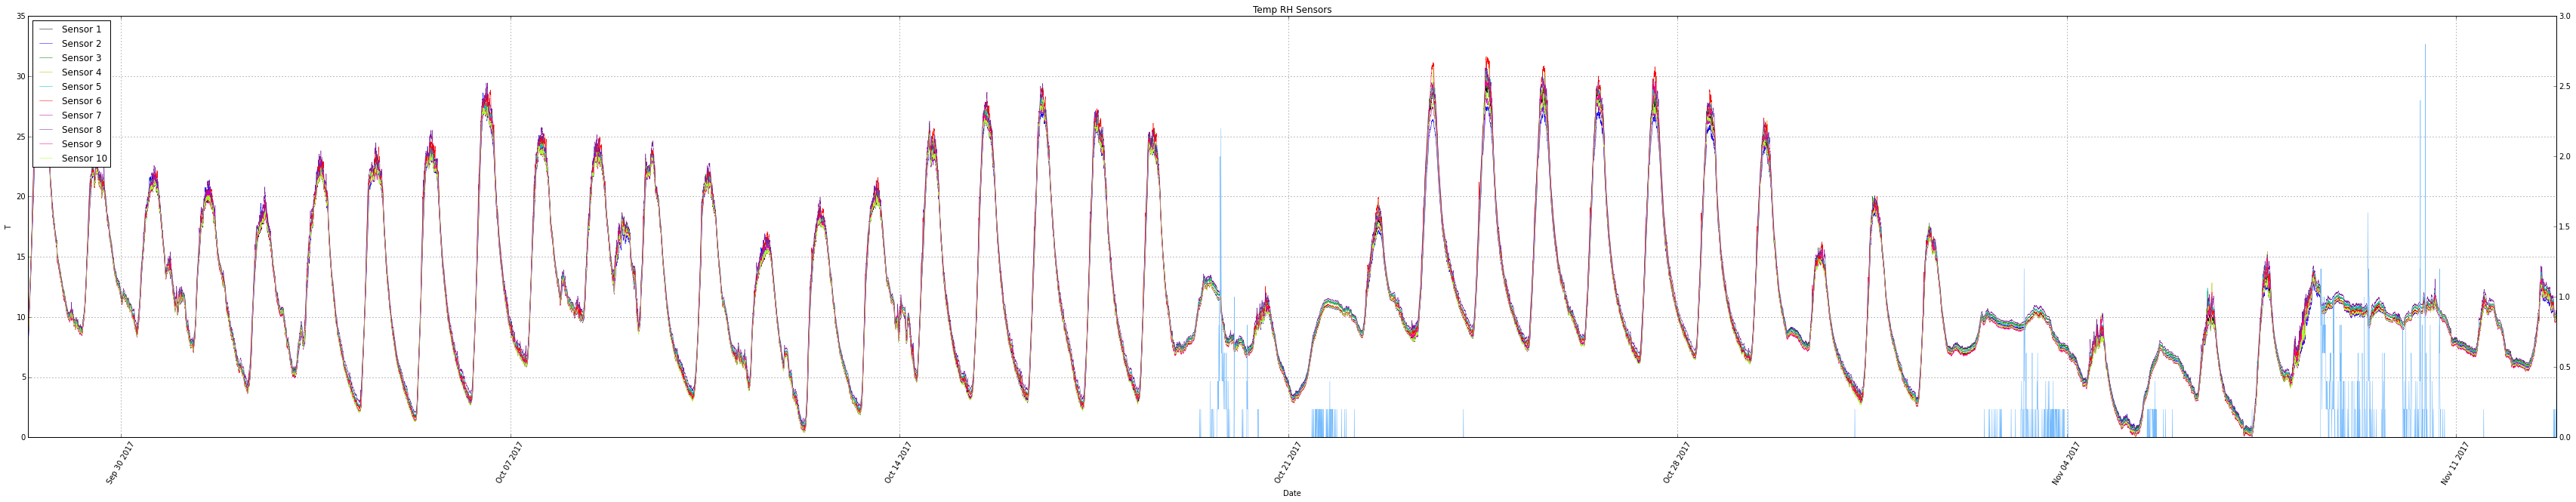

In [10]:
#all CS215 sensors 
fig, ax1 = plt.subplots(figsize=(60,10))
ax1.plot(date_CS215, temp1_CS215, label = 'Sensor 1', color='k', linewidth=.5)
ax1.plot(date_CS215, temp2_CS215, label = 'Sensor 2', color='b', linewidth=.5)
ax1.plot(date_CS215, temp3_CS215, label = 'Sensor 3', color='g', linewidth=.5)
ax1.plot(date_CS215, temp4_CS215, label = 'Sensor 4', color='y', linewidth=.5)
ax1.plot(date_CS215, temp5_CS215, label = 'Sensor 5', color='c', linewidth=.5)
ax1.plot(date_CS215, temp6_CS215, label = 'Sensor 6', color='r', linewidth=.5)
ax1.plot(date_CS215, temp7_CS215, label = 'Sensor 7', color='m', linewidth=.5)
ax1.plot(date_CS215, temp8_CS215, label = 'Sensor 8', color='#7e1e9c', linewidth=.5)
ax1.plot(date_CS215, temp9_CS215, label = 'Sensor 9', color='#ff028d', linewidth=.5)
ax1.plot(date_CS215, temp10_CS215, label = 'Sensor 10', color='#aaff32', linewidth=.5)
legend('Temp RH Sensors', 'T')
ax2=ax1.twinx()
ax2.plot(date_rainTB4[1:12330], rainTB4[1:12330], label = 'rain intensity', color='#75bbfd', linewidth=.5)
plt.show()

In [11]:
#October 23-29 chosen as a representation of clear sunny days. (The regular-looking week following the first rains).
#First, Find indices corresponding to midnight Oct 23, and midnight Oct 29. 

SunnyWeekStart=np.where(date_CS215=='2017-10-23 00:00:00')
SunnyWeekEnd=np.where(date_CS215=='2017-10-29 00:00:00')
#SunnyWeekStart is not a number, but instead looks like (array([35526]),). We want to grab out the number. 
#The number is stored in a 1x1 array, which in python is indexed at [0][0]. That is why we grab by those indices
#to get a plain number in the next line.

SunnyWeekData=CS215[SunnyWeekStart[0][0]:SunnyWeekEnd[0][0]]
SunnyWeekData.head()
#SunnyWeekData.tail() #Can check both by toggling comment on and off 

,TIMESTAMP,RECORD,BattV_Min,AirTC_1,AirTC_1_Avg,RH_1,RH_1_Avg,AirTC_2,AirTC_2_Avg,RH_2,...,RH_8,RH_8_Avg,AirTC_9,AirTC_9_Avg,RH_9,RH_9_Avg,AirTC_10,AirTC_10_Avg,RH_10,RH_10_Avg
35526,10/23/17 0:00,35526,13.03,10.04,10.06,99.4,99.4,10.09,10.09,99.4,...,99.3,99.3,10.07,10.08,99.2,99.2,10.07,10.07,99.7,99.7
35527,10/23/17 0:01,35527,13.02,10.02,10.03,99.4,99.4,10.09,10.10,99.4,...,99.3,99.3,10.08,10.07,99.3,99.2,10.05,10.06,99.8,99.7
35528,10/23/17 0:02,35528,13.02,10.02,10.02,99.5,99.5,10.08,10.09,99.5,...,99.3,99.3,10.06,10.07,99.3,99.3,10.04,10.04,99.8,99.8
35529,10/23/17 0:03,35529,13.02,10.02,10.02,99.5,99.5,10.08,10.08,99.5,...,99.4,99.4,10.07,10.06,99.4,99.4,10.04,10.04,99.8,99.8
35530,10/23/17 0:04,35530,13.03,10.02,10.02,99.5,99.5,10.08,10.08,99.6,...,99.5,99.5,10.06,10.06,99.4,99.4,10.04,10.05,99.9,99.9


In [12]:
SunnyWeekData.dtypes

TIMESTAMP        object
RECORD            int64
BattV_Min       float64
AirTC_1         float64
AirTC_1_Avg     float64
RH_1            float64
RH_1_Avg        float64
AirTC_2         float64
AirTC_2_Avg     float64
RH_2            float64
RH_2_Avg        float64
AirTC_3         float64
AirTC_3_Avg     float64
RH_3            float64
RH_3_Avg        float64
AirTC_4         float64
AirTC_4_Avg     float64
RH_4            float64
RH_4_Avg        float64
AirTC_5         float64
AirTC_5_Avg     float64
RH_5            float64
RH_5_Avg        float64
AirTC_6         float64
AirTC_6_Avg     float64
RH_6            float64
RH_6_Avg        float64
AirTC_7         float64
AirTC_7_Avg     float64
RH_7            float64
RH_7_Avg        float64
AirTC_8         float64
AirTC_8_Avg      object
RH_8            float64
RH_8_Avg         object
AirTC_9         float64
AirTC_9_Avg     float64
RH_9            float64
RH_9_Avg        float64
AirTC_10        float64
AirTC_10_Avg    float64
RH_10           

In [13]:
len(SunnyWeekData.AirTC_10)

8640

In [14]:
#Because the Avg values for sensor 8 are somehow objects instead of float64, lets just use the instantaneous values
#instead. Data collected every minute, so the Avg values aren't really of much use (or aren't substantively different)
#in any case. However, I should learn how to change everything to object. 
SmallSWData=pd.DataFrame([SunnyWeekData['TIMESTAMP'],SunnyWeekData['AirTC_1'],SunnyWeekData['AirTC_2'],
                         SunnyWeekData['AirTC_3'],SunnyWeekData['AirTC_4'],SunnyWeekData['AirTC_5'],
                         SunnyWeekData['AirTC_6'],SunnyWeekData['AirTC_7'],SunnyWeekData['AirTC_8'],
                         SunnyWeekData['AirTC_9'],SunnyWeekData['AirTC_10'],SunnyWeekData['RH_1'],
                         SunnyWeekData['RH_2'],SunnyWeekData['RH_3'],SunnyWeekData['RH_4'],SunnyWeekData['RH_5'],
                         SunnyWeekData['RH_6'],SunnyWeekData['RH_7'],SunnyWeekData['RH_8'],SunnyWeekData['RH_9'],
                         SunnyWeekData['RH_10']])

In [15]:
SmallSWData.head()

,35526,35527,35528,35529,35530,35531,35532,35533,35534,35535,...,44156,44157,44158,44159,44160,44161,44162,44163,44164,44165
TIMESTAMP,10/23/17 0:00,10/23/17 0:01,10/23/17 0:02,10/23/17 0:03,10/23/17 0:04,10/23/17 0:05,10/23/17 0:06,10/23/17 0:07,10/23/17 0:08,10/23/17 0:09,...,10/28/17 23:50,10/28/17 23:51,10/28/17 23:52,10/28/17 23:53,10/28/17 23:54,10/28/17 23:55,10/28/17 23:56,10/28/17 23:57,10/28/17 23:58,10/28/17 23:59
AirTC_1,10.04,10.02,10.02,10.02,10.02,10.01,10.03,10.04,10.08,10.12,...,9.02,9.01,9.03,9.05,9.07,9.09,9.11,9.12,9.11,9.1
AirTC_2,10.09,10.09,10.08,10.08,10.08,10.07,10.08,10.1,10.08,10.1,...,9.35,9.34,9.35,9.35,9.35,9.37,9.38,9.36,9.34,9.31
AirTC_3,10.41,10.41,10.38,10.41,10.38,10.41,10.42,10.42,10.44,10.51,...,9.32,9.33,9.33,9.34,9.37,9.37,9.38,9.36,9.36,9.34
AirTC_4,10.36,10.34,10.34,10.34,10.34,10.33,10.34,10.38,10.41,10.44,...,9.27,9.29,9.3,9.31,9.34,9.38,9.4,9.41,9.37,9.36


In [16]:
SmallSWData.shape

(21, 8640)

In [17]:
HourlySWData=pd.DataFrame(SmallSWData.values.reshape(126,1440))
HourlySWData.head()
#Okay, this is confusing because now the data have lost all their labels. However, because the numbers work out
#correctly, I feel confident that the data have indeed wrapped so that each column contains data only for that 
#particular minute, across all the 6 days under consideration here. There are 1440 minutes in a 24hr period,
#and 1440 columns. 
#The first 6 rows (0-5) are date/timestamps. The next 6 rows are sensor 1 AirTC, the next 6 are sensor 2 Air TC, and
#so on, until we've made it through 60 rows for all 10 AirTC sensors. And then the following 60 rows are RH sensors. 

,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
0,10/23/17 0:00,10/23/17 0:01,10/23/17 0:02,10/23/17 0:03,10/23/17 0:04,10/23/17 0:05,10/23/17 0:06,10/23/17 0:07,10/23/17 0:08,10/23/17 0:09,...,10/23/17 23:50,10/23/17 23:51,10/23/17 23:52,10/23/17 23:53,10/23/17 23:54,10/23/17 23:55,10/23/17 23:56,10/23/17 23:57,10/23/17 23:58,10/23/17 23:59
1,10/24/17 0:00,10/24/17 0:01,10/24/17 0:02,10/24/17 0:03,10/24/17 0:04,10/24/17 0:05,10/24/17 0:06,10/24/17 0:07,10/24/17 0:08,10/24/17 0:09,...,10/24/17 23:50,10/24/17 23:51,10/24/17 23:52,10/24/17 23:53,10/24/17 23:54,10/24/17 23:55,10/24/17 23:56,10/24/17 23:57,10/24/17 23:58,10/24/17 23:59
2,10/25/17 0:00,10/25/17 0:01,10/25/17 0:02,10/25/17 0:03,10/25/17 0:04,10/25/17 0:05,10/25/17 0:06,10/25/17 0:07,10/25/17 0:08,10/25/17 0:09,...,10/25/17 23:50,10/25/17 23:51,10/25/17 23:52,10/25/17 23:53,10/25/17 23:54,10/25/17 23:55,10/25/17 23:56,10/25/17 23:57,10/25/17 23:58,10/25/17 23:59
3,10/26/17 0:00,10/26/17 0:01,10/26/17 0:02,10/26/17 0:03,10/26/17 0:04,10/26/17 0:05,10/26/17 0:06,10/26/17 0:07,10/26/17 0:08,10/26/17 0:09,...,10/26/17 23:50,10/26/17 23:51,10/26/17 23:52,10/26/17 23:53,10/26/17 23:54,10/26/17 23:55,10/26/17 23:56,10/26/17 23:57,10/26/17 23:58,10/26/17 23:59
4,10/27/17 0:00,10/27/17 0:01,10/27/17 0:02,10/27/17 0:03,10/27/17 0:04,10/27/17 0:05,10/27/17 0:06,10/27/17 0:07,10/27/17 0:08,10/27/17 0:09,...,10/27/17 23:50,10/27/17 23:51,10/27/17 23:52,10/27/17 23:53,10/27/17 23:54,10/27/17 23:55,10/27/17 23:56,10/27/17 23:57,10/27/17 23:58,10/27/17 23:59


In [68]:
#Goal: Subset dataframe HourlySWData into each sensor, each variable
timestamps=HourlySWData[:6]
HourlyAirTSensor1=HourlySWData[6:12]
HourlyAirTSensor2=HourlySWData[12:18]
HourlyAirTSensor3=HourlySWData[18:24]
HourlyAirTSensor4=HourlySWData[24:30]
HourlyAirTSensor5=HourlySWData[30:36]
HourlyAirTSensor6=HourlySWData[36:42]
HourlyAirTSensor7=HourlySWData[42:48]
HourlyAirTSensor8=HourlySWData[48:54]
HourlyAirTSensor9=HourlySWData[54:60]
HourlyAirTSensor10=HourlySWData[60:66]
HourlyAirTSunWeek=HourlySWData[6:66]
HourlyRHSensor1=HourlySWData[66:72]
HourlyRHSensor2=HourlySWData[72:78]
HourlyRHSensor3=HourlySWData[78:84]
HourlyRHSensor4=HourlySWData[84:90]
HourlyRHSensor5=HourlySWData[90:96]
HourlyRHSensor6=HourlySWData[96:102]
HourlyRHSensor7=HourlySWData[102:108]
HourlyRHSensor8=HourlySWData[108:114]
HourlyRHSensor9=HourlySWData[114:120]
HourlyRHSensor10=HourlySWData[120:126]
HourlyRHSunWeek=HourlySWData[66:126]


#Then check that they all look okay. Each individual sensor should be 6x1440, each sensor type should be 60x1440
for sensor in [HourlyAirTSensor1, HourlyAirTSensor2, HourlyAirTSensor3, HourlyAirTSensor4, HourlyAirTSensor5, 
               HourlyAirTSensor6, HourlyAirTSensor7, HourlyAirTSensor8, HourlyAirTSensor9, HourlyAirTSensor10,
              HourlyRHSensor1, HourlyRHSensor2, HourlyRHSensor3, HourlyRHSensor4, HourlyRHSensor5, HourlyRHSensor6,
              HourlyRHSensor7, HourlyRHSensor8, HourlyRHSensor9, HourlyRHSensor10, HourlyAirTSunWeek, HourlyRHSunWeek,timestamps]: 
    print(sensor.shape)
    #print (sensor)

(6, 1440)
(6, 1440)
(6, 1440)
(6, 1440)
(6, 1440)
(6, 1440)
(6, 1440)
(6, 1440)
(6, 1440)
(6, 1440)
(6, 1440)
(6, 1440)
(6, 1440)
(6, 1440)
(6, 1440)
(6, 1440)
(6, 1440)
(6, 1440)
(6, 1440)
(6, 1440)
(60, 1440)
(60, 1440)
(6, 1440)


In [71]:
#Goal: Average each sensor across the rows. This will average minute by minute across all 6 days, generating an 
#average 'climate' minute by minute. Axis=0 means it is averaging over the columns, which is confusing because it 
#ought to be over the rows, but this is what gives the right output (i.e. a vector 1440 in length). If you use axis=1
#which supposedly averages over rows you get a vector output of length 6. So I'm just going with what looks correct
#in terms of output.
SunWeekDT=pd.to_datetime(timestamps.values.reshape(8640,)) #use SunWeekDT[:1440] for plotting. this is just one day.
S1ClimAT=numpy.mean(HourlyAirTSensor1, axis=0) 
S2ClimAT=numpy.mean(HourlyAirTSensor2, axis=0) 
S3ClimAT=numpy.mean(HourlyAirTSensor3, axis=0) 
S4ClimAT=numpy.mean(HourlyAirTSensor4, axis=0) 
S5ClimAT=numpy.mean(HourlyAirTSensor5, axis=0) 
S6ClimAT=numpy.mean(HourlyAirTSensor6, axis=0) 
S7ClimAT=numpy.mean(HourlyAirTSensor7, axis=0) 
S8ClimAT=numpy.mean(HourlyAirTSensor8, axis=0) 
S9ClimAT=numpy.mean(HourlyAirTSensor9, axis=0) 
S10ClimAT=numpy.mean(HourlyAirTSensor10, axis=0) 
AvClimATSunWeek=numpy.mean(HourlyAirTSunWeek, axis=0) 
S1ClimRH=numpy.mean(HourlyRHSensor1, axis=0) 
S2ClimRH=numpy.mean(HourlyRHSensor2, axis=0) 
S3ClimRH=numpy.mean(HourlyRHSensor3, axis=0) 
S4ClimRH=numpy.mean(HourlyRHSensor4, axis=0) 
S5ClimRH=numpy.mean(HourlyRHSensor5, axis=0)
S6ClimRH=numpy.mean(HourlyRHSensor6, axis=0) 
S7ClimRH=numpy.mean(HourlyRHSensor7, axis=0) 
S8ClimRH=numpy.mean(HourlyRHSensor8, axis=0) 
S9ClimRH=numpy.mean(HourlyRHSensor9, axis=0) 
S10ClimRH=numpy.mean(HourlyRHSensor10, axis=0) 
AvClimRHSunWeek=numpy.mean(HourlyRHSunWeek, axis=0)

#check that they are all the right length. Should be 1440, not 6.
for sensor in [S1ClimAT, S2ClimAT, S3ClimAT, S4ClimAT, S5ClimAT, S6ClimAT, S7ClimAT, S8ClimAT, S9ClimAT, S10ClimAT,
              S1ClimRH, S2ClimRH, S3ClimRH, S4ClimRH, S5ClimRH, S6ClimRH, S7ClimRH, S8ClimRH, S9ClimRH, S10ClimRH, 
               AvClimATSunWeek, AvClimRHSunWeek,SunWeekDT]: 
    print(sensor.shape)

(1440,)
(1440,)
(1440,)
(1440,)
(1440,)
(1440,)
(1440,)
(1440,)
(1440,)
(1440,)
(1440,)
(1440,)
(1440,)
(1440,)
(1440,)
(1440,)
(1440,)
(1440,)
(1440,)
(1440,)
(1440,)
(1440,)
(8640,)


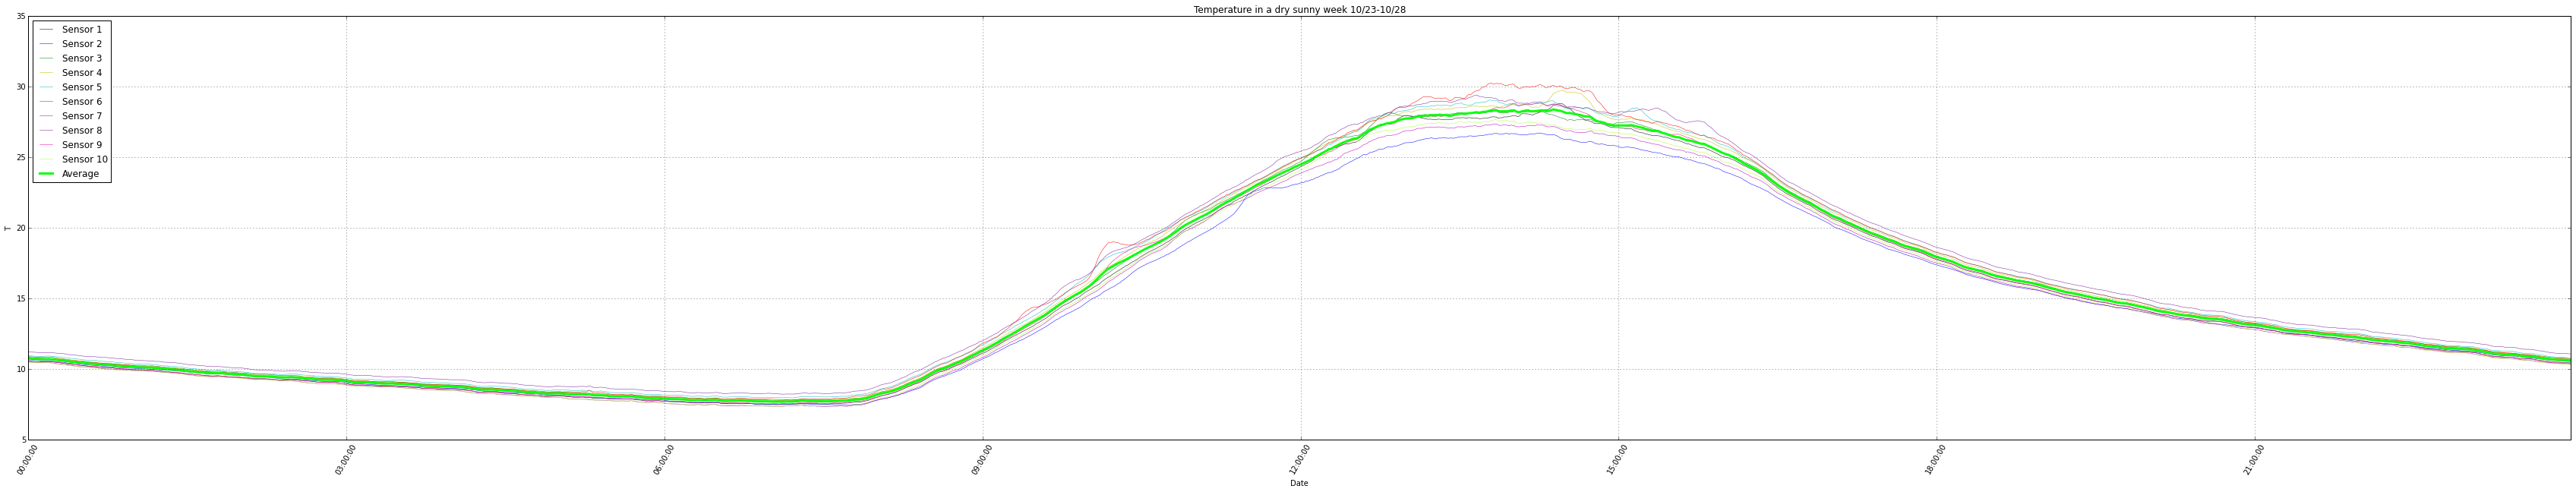

In [77]:
#make some line plots
fig, ax1 = plt.subplots(figsize=(60,10))
ax1.plot(SunWeekDT[:1440], S1ClimAT, label = 'Sensor 1', color='k', linewidth=.5)
ax1.plot(SunWeekDT[:1440], S2ClimAT, label = 'Sensor 2', color='b', linewidth=.5)
ax1.plot(SunWeekDT[:1440], S3ClimAT, label = 'Sensor 3', color='g', linewidth=.5)
ax1.plot(SunWeekDT[:1440], S4ClimAT, label = 'Sensor 4', color='y', linewidth=.5)
ax1.plot(SunWeekDT[:1440], S5ClimAT, label = 'Sensor 5', color='c', linewidth=.5)
ax1.plot(SunWeekDT[:1440], S6ClimAT, label = 'Sensor 6', color='r', linewidth=.5)
ax1.plot(SunWeekDT[:1440], S7ClimAT, label = 'Sensor 7', color='m', linewidth=.5)
ax1.plot(SunWeekDT[:1440], S8ClimAT, label = 'Sensor 8', color='#7e1e9c', linewidth=.5)
ax1.plot(SunWeekDT[:1440], S9ClimAT, label = 'Sensor 9', color='#ff028d', linewidth=.5)
ax1.plot(SunWeekDT[:1440], S10ClimAT, label = 'Sensor 10', color='#aaff32', linewidth=.5)
ax1.plot(SunWeekDT[:1440], AvClimATSunWeek, label = 'Average', color='#0cff0c', linewidth=3)
legend('Temperature in a dry sunny week 10/23-10/28', 'T')
#ax2=ax1.twinx()
#ax2.plot(date_rainTB4[1:12330], rainTB4[1:12330], label = 'rain intensity', color='#75bbfd', linewidth=.5)
plt.show()

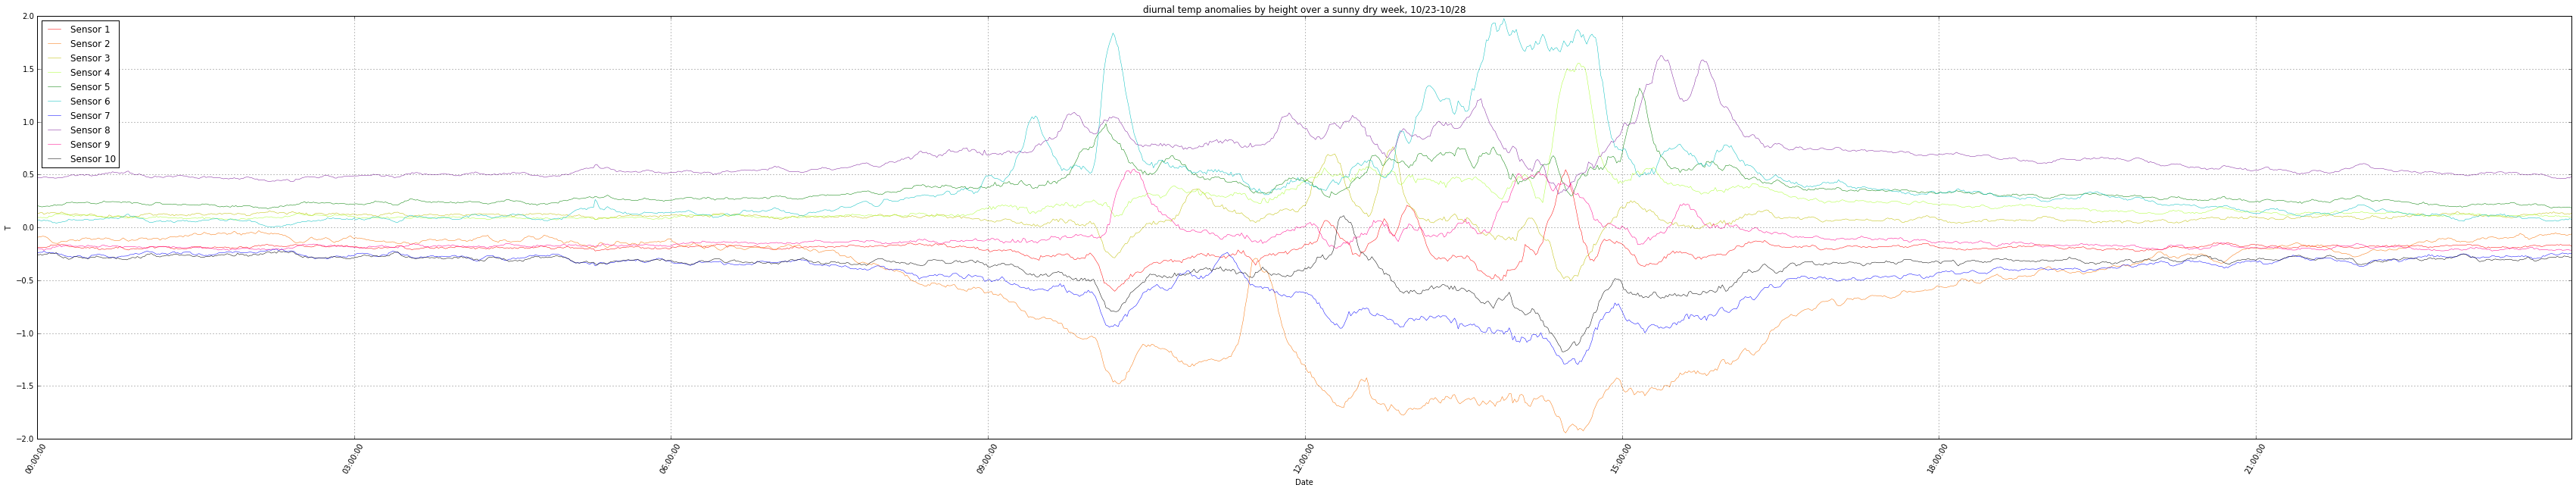

In [82]:
#Subtract out the mean and replot it for this week
S1ATAnom=S1ClimAT-AvClimATSunWeek
S2ATAnom=S2ClimAT-AvClimATSunWeek
S3ATAnom=S3ClimAT-AvClimATSunWeek
S4ATAnom=S4ClimAT-AvClimATSunWeek
S5ATAnom=S5ClimAT-AvClimATSunWeek
S6ATAnom=S6ClimAT-AvClimATSunWeek
S7ATAnom=S7ClimAT-AvClimATSunWeek
S8ATAnom=S8ClimAT-AvClimATSunWeek
S9ATAnom=S9ClimAT-AvClimATSunWeek
S10ATAnom=S10ClimAT-AvClimATSunWeek

fig, ax1 = plt.subplots(figsize=(60,10))
ax1.plot(SunWeekDT[:1440], S1ATAnom, label = 'Sensor 1', color='r', linewidth=.5)
ax1.plot(SunWeekDT[:1440], S2ATAnom, label = 'Sensor 2', color='#f97306', linewidth=.5)
ax1.plot(SunWeekDT[:1440], S3ATAnom, label = 'Sensor 3', color='y', linewidth=.5)
ax1.plot(SunWeekDT[:1440], S4ATAnom, label = 'Sensor 4', color='#aaff32', linewidth=.5)
ax1.plot(SunWeekDT[:1440], S5ATAnom, label = 'Sensor 5', color='g',   linewidth=.5)
ax1.plot(SunWeekDT[:1440], S6ATAnom, label = 'Sensor 6', color='c', linewidth=.5)
ax1.plot(SunWeekDT[:1440], S7ATAnom, label = 'Sensor 7', color='b', linewidth=.5)
ax1.plot(SunWeekDT[:1440], S8ATAnom, label = 'Sensor 8', color='#7e1e9c', linewidth=.5)
ax1.plot(SunWeekDT[:1440], S9ATAnom, label = 'Sensor 9', color='#ff028d', linewidth=.5)
ax1.plot(SunWeekDT[:1440], S10ATAnom, label = 'Sensor 10', color='k', linewidth=.5)
#ax1.plot(SunWeekDT[:1440], AvClimATSunWeek, label = 'Average', color='#0cff0c', linewidth=3)
legend('diurnal temp anomalies by height over a sunny dry week, 10/23-10/28', 'T')

In [47]:
HourlySWData.name

AttributeError: 'DataFrame' object has no attribute 'name'

In [137]:
pd.Series([SunnyWeekData.AirTC_1_Avg])

0    35526    10.06
35527    10.03
35528    10.02
3...
dtype: object

In [138]:
SunnyWeekData.AirTC_1_Avg

35526    10.06
35527    10.03
35528    10.02
35529    10.02
35530    10.02
35531    10.01
35532    10.02
35533    10.03
35534    10.07
35535    10.11
35536    10.12
35537    10.14
35538    10.15
35539    10.18
35540    10.18
35541    10.15
35542    10.11
35543    10.08
35544    10.11
35545    10.11
35546    10.12
35547    10.10
35548    10.11
35549    10.11
35550    10.10
35551    10.07
35552    10.06
35553    10.05
35554    10.03
35555    10.06
         ...  
44136     9.39
44137     9.39
44138     9.39
44139     9.39
44140     9.37
44141     9.37
44142     9.34
44143     9.30
44144     9.25
44145     9.19
44146     9.12
44147     9.09
44148     9.05
44149     9.06
44150     9.06
44151     9.06
44152     9.02
44153     9.03
44154     9.02
44155     9.01
44156     9.02
44157     9.02
44158     9.02
44159     9.05
44160     9.07
44161     9.09
44162     9.11
44163     9.12
44164     9.12
44165     9.11
Name: AirTC_1_Avg, dtype: float64

In [231]:
Sensor1={'DateTime': [SunnyWeekDT], 'AirTC': [SunnyWeekData.AirTC_1], 'RH': [SunnyWeekData.RH_1]}
S1=pd.DataFrame(Sensor1)
Sensor2={'DateTime': [SunnyWeekDT], 'AirTC': [SunnyWeekData.AirTC_2], 'RH': [SunnyWeekData.RH_2]}
S2=pd.DataFrame(Sensor2)
Sensor3={'DateTime': [SunnyWeekDT], 'AirTC': [SunnyWeekData.AirTC_3], 'RH': [SunnyWeekData.RH_3]}
S3=pd.DataFrame(Sensor3)
Sensor4={'DateTime': [SunnyWeekDT], 'AirTC': [SunnyWeekData.AirTC_4], 'RH': [SunnyWeekData.RH_4]}
S4=pd.DataFrame(Sensor4)
Sensor5={'DateTime': [SunnyWeekDT], 'AirTC': [SunnyWeekData.AirTC_5], 'RH': [SunnyWeekData.RH_5]}
S5=pd.DataFrame(Sensor5)
Sensor6={'DateTime': [SunnyWeekDT], 'AirTC': [SunnyWeekData.AirTC_6], 'RH': [SunnyWeekData.RH_6]}
S6=pd.DataFrame(Sensor6)
Sensor7={'DateTime': [SunnyWeekDT], 'AirTC': [SunnyWeekData.AirTC_7], 'RH': [SunnyWeekData.RH_7]}
S7=pd.DataFrame(Sensor7)
Sensor8={'DateTime': [SunnyWeekDT], 'AirTC': [SunnyWeekData.AirTC_8], 'RH': [SunnyWeekData.RH_8]}
S8=pd.DataFrame(Sensor8)
Sensor9={'DateTime': [SunnyWeekDT], 'AirTC': [SunnyWeekData.AirTC_9], 'RH': [SunnyWeekData.RH_9]}
S9=pd.DataFrame(Sensor9)
Sensor10={'DateTime': [SunnyWeekDT], 'AirTC': [SunnyWeekData.AirTC_10], 'RH': [SunnyWeekData.RH_10]}
S10=pd.DataFrame(Sensor10)

SunWeek=pd.concat[S1,S2]


TypeError: 'function' object is not subscriptable

In [230]:
SunWeek.head()

AttributeError: 'list' object has no attribute 'head'

In [250]:
a=[5,7,9]
b=[4,6,8]
c=pd.DataFrame([a,b])

In [257]:
c.ix[:0]

,0,1,2
0,5,7,9
